<center>
<img src="https://github.com/hse-econ-data-science/andan_2023/blob/main/hw/hw04/images/AB.jpeg?raw=true" height="200"> 

# Андан на экономе: домашнее задание 4 
## Проверка гипотез и А/Б-тестирование
</center>




## Импорт необходимых библиотек 

Импортируйте все используемые библиотеки здесь.

In [1]:
import pandas as pd 
import numpy as np
import scipy.stats as sts
from scipy.stats import ttest_ind
from scipy.stats import levene
from scipy.stats import ttest_rel
from scipy.stats import shapiro
from statsmodels. stats.proportion import proportions_ztest
import function as f

import matplotlib.pyplot as plt
import seaborn as sns

from collections import defaultdict

In [2]:
# Отключение некоторых лишних предупреждений
import warnings
warnings.filterwarnings("ignore")

In [3]:
sns.set_theme(style="whitegrid", palette="muted")
plt.rcParams['figure.figsize'] = (8, 4)

# Часть 1: Процедура проверки гипотез

Для начала повторим теорию проверки гипотез и поотвечаем на различные вопросы. 

> Ниже вас ждут несколько примеров гипотез, на которые вам нужно получить статистически значимые ответы. Вы можете пользоваться встроенными функциями тестов, можете писать свои, а можете использовать с семинаров – это не влияет на полученные баллы. Вы также оставляете за собой право выбрать, проверять гипотезу через `p-value` или по критическим точкам или вообще по доверительным интервалам (но здесь будьте осторожнее, особенно, когда у вас 2 выборки). 

__Здесь важно:__

- Правильно посчитать `p-value` либо наблюдаемое значение критерия (либо дов. интервал);
- Правильно сделать вывод об отвержении / не отвержении нулевой гипотезы;
- Правильно выбрать тест для проверки и обосновать, почему вы выбрали именно его.

Гипотезы проверяйте на $5\%$ уровне значимости

## Задача №1: Экзамен

<img src="https://github.com/hse-econ-data-science/andan_2023/blob/main/hw/hw04/images/exam.jpeg?raw=true" width="400" align='left'>

У вас есть набор данных об оценках студентов на экзамене. Каждая строка в датасете – отдельный студент. Датасет представляет собой следующие колонки:

* `gender` – пол
* `race/ethnicity` – раса / этническая принадлежность
* `parental level of education` – уровень образования
* `lunch` – получает ли бесплатные обеды (тип питания)
* `test preparation course` – прошел ли курсы по подготовке к тесту
* `math score` – баллы за математику
* `reading score` – баллы за чтение
* `writing score` – баллы за письменность

In [4]:
df = pd.read_csv('data/students_exam.csv')
df.head(3)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93


__а)__ __[5 баллов]__  Проверьте гипотезу о том, что студенты, получившие высшее образование (associate's degree, bachelor's degree, master's degree) в среднем пишут математику на большее число баллов, чем студенты со средним образованием (high school, some high school, some college). 

Уровень значимости: $5\%$

$$
\begin{aligned}
& H_0: \mu_{high} = \mu_{middle} \\
& H_1: \mu_{high} > \mu_{middle}
\end{aligned}
$$

__Подсказка:__ В тесте 2 выборки: студенты с высшим образованием и со средним. Подумайте о том, как эти выборки связаны между собой. Также обратите внимание на альтернативную гипотезу!

Создаем две выборки, основанные на `parental level of education` и гистограммы для показателей каждого образца

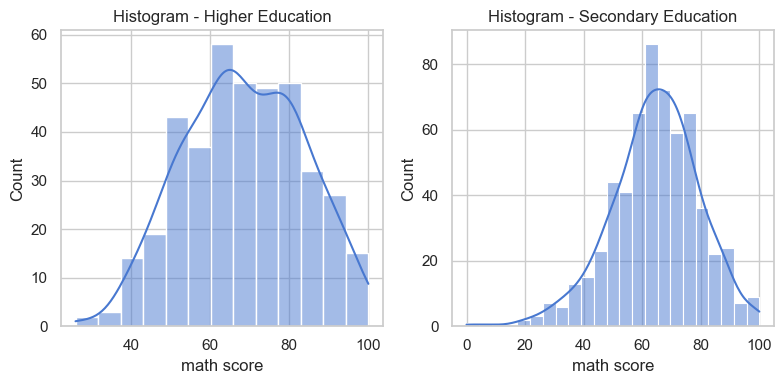

In [5]:
higher_edu = df[df['parental level of education'].isin(["associate's degree", "bachelor's degree", "master's degree"])]
secondary_edu = df[df['parental level of education'].isin(["high school", "some high school", "some college"])]

plt.subplot(1, 2, 1)
sns.histplot(higher_edu['math score'], kde=True)
plt.title('Histogram - Higher Education')

plt.subplot(1, 2, 2)
sns.histplot(secondary_edu['math score'], kde=True)
plt.title('Histogram - Secondary Education')
plt.tight_layout()
plt.show()

Используем тест `Левена` для оценки однородности отклонений.

In [6]:
_, p_value = levene(higher_edu['math score'], secondary_edu['math score'])

p_value

0.15349982215643904

Используем `t-test` для независимых выборок для вычисления `t-statistic` и `p-value` для сравнения средних значений двух групп.

In [7]:
t_statistic, p_value = ttest_ind(higher_edu['math score'], secondary_edu['math score'], alternative='greater')

alpha = 0.05

t_statistic, p_value

(4.311126649886476, 8.926343543260077e-06)

_В данном случае `t-value` равно 4,311126649886476, что указывает на большую разницу между средними баллами по математике учащихся с высшим образованием и учащихся со средним образованием._

_Поскольку значение `p-value` меньше уровня значимости `0,05`, мы отвергаем нулевую гипотезу. Это говорит о том, что имеется достаточно доказательств для вывода о том, что учащиеся с высшим образованием имеют более высокий средний балл по математике по сравнению с учащимися со средним образованием._

__Почему вы выбрали для проверки гипотезы именно тот критерий, что вы выбрали? Какие у него предпосылки? Все ли они выполняются с данными?__

__Ответ:__ для проверки гипотезы был выбран независимый t-критерий с двумя выборками. Выбор этого критерия основан на следующих предпосылках:

- __Независимость:__ две выборки, высшее и среднее образование, независимы друг от друга.

- __Нормальность:__ `t-критерий` предполагает, что в обеих выборках данные соответствуют нормальному распределению. В нашем случае оценки по математике в обеих выборках значительно отличаются от нормального распределения. Это означает, что предположение о нормальности нарушено для обеих групп. 

- __Однородность дисперсий:__ в нашем случае значение `p` равное `0.15349982215643904`, полученное с помощью теста Левена, предполагает, что существенной разницы в показателях не наблюдается. Поэтому, предпосылка по однородности отклонений выполняется.

__б)__ __[5 баллов]__  Правда ли что в среднем студенты пишут экзамен по `reading` так же, как и по `math`? 

Уровень значимости: $5\%$

$$
\begin{aligned}
& H_0: \mu_{math} = \mu_{reading} \\
& H_1: \mu_{math} \neq \mu_{reading}
\end{aligned}
$$

__Подсказка:__ В тесте 2 выборки: баллы по чтению и баллы по математике. Подумайте о том, как эти выборки связаны между собой. Также обратите внимание на альтернативную гипотезу!

Рассчитываем разницу между оценками по математике и чтению для выполнения парного `t-test`, проверяем выполняются ли предпосылки и визуализируем результаты.

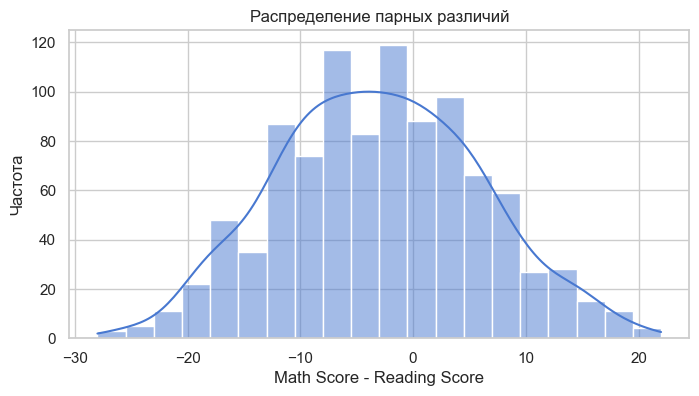

p-value: 0.00756301824003458
Диапазон оценок по математике: 0 - 100
Диапазон оценок по чтению: 17 - 100


In [8]:
differences = df['math score'] - df['reading score']

sns.histplot(differences, kde=True)
plt.xlabel('Math Score - Reading Score')
plt.ylabel('Частота')
plt.title('Распределение парных различий')
plt.show()

_, p_value = shapiro(differences)

print(f"p-value: {p_value}")
print(f"Диапазон оценок по математике: {df['math score'].min()} - {df['math score'].max()}")
print(f"Диапазон оценок по чтению: {df['reading score'].min()} - {df['reading score'].max()}")


Используем `t-test` для зависимых выборок для вычисления `t-value` и `p-value`

In [9]:
t_statistic, p_value = ttest_rel(df['math score'], df['reading score'])

alpha = 0.05

t_statistic, p_value

(-10.816230631665421, 7.322335900414137e-26)

__Отвергаем нулевую гипотезу.__

Имеется достаточно доказательств, чтобы сделать вывод о существовании разницы
между средним баллом по математике и средним баллом по чтению.

`p-value` значительно ниже урвня значимости, что свидетельствует о доказательствах против нулевой гиоптезы. 

__Почему вы выбрали для проверки гипотезы именно тот критерий, что вы выбрали? Какие у него предпосылки? Все ли они выполняются с данными?__

__Ответ:__ парный t-критерий выбран для проверки гипотезы, поскольку мы сравниваем средние баллы одной и той же группы учащихся по двум разным предметам. Также для выбора этого критерия были проверяны следущие предпосылки:

- __Нормальность:__ значение `p`, полученное с помощью теста `Shapiro-Wilk`, предполагает, что распределение парных различий значительно отклоняется от нормального распределения.

- __Шкала интервалов или соотношений:__ подтверждается диапазонами оценок, так как они измеряются по интервальной шкале и являются числовыми значениями.

## Задача №2:  О мышах и людях

<img src="https://github.com/hse-econ-data-science/andan_2023/blob/main/hw/hw04/images/vagon.jpeg?raw=true" width="400" align='left'>

Для изучения аспектов процесса принятия моральных решений психологи уже много лет используют этические дилеммы, с помощью которых оценивают действия людей в гипотетических ситуациях. Один из самых известных примеров — это [проблема вагонетки,](https://ru.wikipedia.org/wiki/Проблема_вагонетки) в которой необходимо принять решение о том, стоит ли пожертвовать одним человеком для спасения пятерых.

Бельгийские психологи воплотили дилемму в реальную жизнь. Участники эксперимента должны были выбрать, ударить током пять мышей или одну мышь. Эксперимент проходил следующим образом. Участника сажали перед двумя клетками, в одной из которых сидели пять мышей, а в другой — одна. Перед клетками стоял ноутбук с $20$-секундным таймером: участникам сообщили, что по истечении этих $20$ секунд в клетку с пятью мышами пустят ток, и мыши получат не смертельный, но очень болезненный удар. Пока время идет, участник может нажать на кнопку: в этом случае ток пустят по клетке с одной мышью. В исследовании использовали живых мышей. 

Удары тока были ненастоящими: сразу же после «удара» участников сопроводили в отдельную комнату, где разъяснили им, что мыши в полном порядке и током их не били (об этом заранее догадались только $12$ участников). В решении реальной проблемы вагонетки приняли участие $192$ человека, а еще $83$ решали такую же задачку, но гипотетическую (на бумаге). Все участники также прошли онлайн-опросы, в ходе которых учёные собрали о респондентах кучу дополнительной информации. 

В файле `mouse.csv` лежит информация о том, как прошёл эксперимент. Нас будут интересовать столбцы: 

* __STUDY:__ какую проблему вагонетки решал человек $1$, если на бумаге и $2$, если реальную
* __AGE:__ возраст респондента 
* __GENDER:__ пол респондента
* __DECISION:__ решение дилеммы ($1$ - жать на кнопу, $0$ - не жать) 
* __RT:__ время, которое респондент потратил, чтобы нажать на кнопку 

Подробное описание данных, сами данные и даже код на R, использованный при оценивании моделей, можно найти в [репозитории исследования.](https://osf.io/kvb99/) В статье авторы строили несколько логистических регрессий, чтобы очистить эффект от психологических особенностей респондентов. Про подобные приёмы очистки мы немного поговорим позже.  Также более подробно про исследование [можно почитать на N + 1.](https://nplus1.ru/news/2018/05/11/mice-trolley)

In [10]:
df = pd.read_csv('data/mouse.csv', sep='\t')

# отбираем нужные колонки
df = df[['STUDY', 'AGE', 'GENDER', 'DECISION', 'RT']]

# удаляем пропуски по колонке DECISION (то есть тех, кто не смог принять решение)
df = df[~df.DECISION.isnull()]
df.head(3)

,STUDY,AGE,GENDER,DECISION,RT
3,1,21,0,1.0,9.212427
4,1,20,0,1.0,17.071711
5,1,21,1,1.0,9.827884


__а)__ __[5 баллов]__ Попытаемся ответить на тот же вопрос, что и исследователи. В какой из двух ситуаций респонденты чаще принимают решение нажать кнопку: в реальной или на бумаге?

Уровень значимости: $5\%$

$$
\begin{aligned}
&H_0: \hspace{2mm} p_1 = p_2 \hspace{2mm} \text{(На бумаге и в реальности жмут на кнопку одинаково часто)} \\
&H_1: \hspace{2mm} p_1 > p_2  \hspace{2mm} \text{(На бумаге на кнопку жмут чаще)}
\end{aligned}
$$

Рассчитываем пропорции участников, которые нажимают на кнопку и выполняем `z-test` для двух пропорций.

In [11]:
on_paper = df[df['STUDY'] == 1]['DECISION']
in_reality = df[df['STUDY'] == 2]['DECISION']

_, p_value = proportions_ztest([on_paper.sum(), in_reality.sum()], [len(on_paper), len(in_reality)], alternative='larger')

p_value

0.008701077805778048

`p_value` равно 0,0087, что меньше уровня значимости 0,05. Следовательно, у нас есть достаточные доказательства, чтобы отвергнуть нулевую гипотезу.

__Почему вы выбрали для проверки гипотезы именно тот критерий, что вы выбрали? Какие у него предпосылки? Все ли они выполняются с данными?__

__Ответ:__ В этом анализе для проверки гипотезы был использован z-тест для двух. Условиями для проведения этого теста являются следующие предпосылки:

- __Случайные и независимые выборки:__ в этом случае анализ предполагает, что участники были выбраны случайным образом.

- __Аппроксимация биномиального распределения:__ количество успехов и неудач должно быть достаточно большим, чтобы биномиальное распределение можно было аппроксимировать нормальным распределением. В нашем случае количество участников в каждой группе достаточно велико.

- __Независимость наблюдений:__ исходя из анализа решения, принятые каждым участником, были независимы друг от друга.

__б)__ __[5 баллов]__  Кровожадные люди быстро берут на себя ответственность за удар мышки током. Будем считать, что кровожадные люди принимают решение менее, чем за пять секунд. Правда ли, что люди по своей природе кровожадные? 

Уровень значимости: $5\%$

$$
\begin{aligned}
&H_0: \hspace{2mm} \mu \le 5 \hspace{2mm} \text{(Люди кровожадны)} \\
&H_1: \hspace{2mm} \mu > 5  \hspace{2mm} \text{(Люди не кровожадны)}
\end{aligned}
$$

Проверяем тип данных столбца `RT`

In [12]:
df["RT"].dtype

dtype('float64')

Проверка на нормальность распределения

In [13]:
reaction_times = df['RT']

shapiro_stat, shapiro_pvalue = sts.shapiro(reaction_times)

shapiro_pvalue

1.0

`shapiro_pvalue`, равное `1,0`, предполагает, что данные соответствуют нормальному распределению.

Основываясь на времени, затрачиваемом на принятие решения, проводим `t-test` на одной выборке.

In [14]:
bloodthirsty = df[df['RT'] < 5]['RT']

t_statistic, p_value = sts.ttest_1samp(bloodthirsty, 5, alternative='less')

p_value

2.379267607809151e-09

Значение `p`, равное `2,379267607809151e-09`, которое меньше уровня значимости `0,05` указывает на веские доказательства против нулевой гипотезы.

__Почему вы выбрали для проверки гипотезы именно тот критерий, что вы выбрали? Какие у него предпосылки? Все ли они выполняются с данными?__

__Ответ:__ В данном случае для проверки гипотезы о кровожадности людей был выбран t-критерий из одной выборки, основанный на времени их реакции. Выбор этого теста основан на следующих причинах:

- __Нормальность:__ значение `p`, полученное с помощью теста `Shapiro-Wilk`, предполагает, что данные имеют нормальное распределение.

- __Случайные и независимые выборки:__ в этом случае анализ предполагает, что участники были выбраны случайным образом.

- __Достаточный размер выборки::__ В нашем исследовании выборка достаточно велика.

- __Независимость наблюдений:__ исходя из анализа исследования, наблюдения (время реакции) независимы друг от друга.

## Задача №3:  Парадокс

<img src="https://github.com/hse-econ-data-science/andan_2023/blob/main/hw/hw04/images/simpson.jpg?raw=true" width="350" align='left'>

Помимо решения задач и применения различных функций из библиотек необходимо очень аккуратно работать с данным и понимать, какие действия корректны, а какие нет. Перед вами результаты медицинских исследований: 

- из $1650$ мужчин, принимавших лекарство, выздоровели $770$, 
- из $223$ мужчин, не принимавших лекарство, выздоровели $88$,
- из $245$ женщин, принимавших лекарство, выздоровели $165$,
- из $750$ женщин, не принимавших лекарство женщин, выздоровели $440$.

Необходимо найти ответы на следующие вопросы: 

1. Влияет ли лекарство на мужчин?
2. Влияет ли лекарство на женщин? 
3. Влияет ли лекарство на людей обоих полов в целом?

Будем считать, что исследование проводилось методом двойного слепого тестирования. Врач не знал, даёт ли он пациенту плацебо или лекарство, пациент не знал, пьёт ли он плацебо или лекарство. 

Запишем данные в табличку. Пусть $A$ — принимавшие лекарство, $\overline{A}$ — не принимавшие лекарство, $B$ — выздоровевшие, $\overline{B}$ — не выздоровевшие.

<!--<img width="60%" src="pics/pic2.png">-->
<table>
<tr><td>
    
|Мужчины| $B$ |  $\overline{B}$|
|--|--|--|
|$A$| 770 | 880 |
|$\overline{A}$| 88 | 135 |

</td><td>
    
|Женщины| $B$ |  $\overline{B}$|
|--|--|--|
|$A$| 165 | 80 |
|$\overline{A}$| 440 | 310 |

</td><td>

|Вместе| $B$ |  $\overline{B}$|
|--|--|--|
|$A$| 935 | 960 |
|$\overline{A}$| 528 | 445 |

</td></tr> </table>

Для решения задачи воспользуйтесь критерием хи-квадрат Пирсона. Мы его не разбирали на семинарах, однако на курсе матстата он у вас был. Вспомнить как он работает можно [в этом видео.](https://www.youtube.com/watch?v=bws1CB9XZ6E&list=PLCf-cQCe1FRyCcf47wwBlDObNcz4ud2_L&index=10) Посмотреть на код можно [в этом видео.](https://www.youtube.com/watch?v=H3NtBN_o-hk&list=PLCf-cQCe1FRyCcf47wwBlDObNcz4ud2_L&index=12) Тетрадку с кодом можно [найти тут.](https://github.com/FUlyankin/matstat-AB/blob/main/week10_nonparam_bootstrap/04_05_python_kolmogorov_pearson.ipynb)

Тест поможет нам понять, есть ли у лекарства какой-то эффект. Применить тест в python помогает функция `chi2_contingency` из пакета `scipy.stats`. Используйте её с параметром `correction=False`.

__а)__ __[5 баллов]__ Давайте попробуем найти ответ на вопрос, есть ли эффект от лекарства для мужчин? 

Давайте предварительно посчитаем долю выздровевших мужчин, которые принимали лекарство и долю выздровевших мужчин, которые не принимали лекартсво. Сравните эти доли.

In [15]:
recovered_men_with_med = 770
not_recovered_men_with_med = 880
recovered_men_without_med = 88
not_recovered_men_without_med = 135

proportion_with_med = recovered_men_with_med / (recovered_men_with_med + not_recovered_men_with_med)
proportion_without_med = recovered_men_without_med / (recovered_men_without_med + not_recovered_men_without_med)

print(f"{proportion_with_med} > {proportion_without_med}")

0.4666666666666667 > 0.39461883408071746


Создадим матрицу размера $2 \times 2.$ Внесём в неё частоты, полученные для мужчин.

In [16]:
men = np.array([[770,880],
                [88,135]])

Примените тест с параметром `correction=False` и сделайте выводы на уровне значимости $5\%.$

In [17]:
chi2, p_value, dof, expect_matrix = sts.chi2_contingency(men, correction=False)

expect_matrix, p_value

(array([[755.84623599, 894.15376401],
        [102.15376401, 120.84623599]]),
 0.04268446899604581)

Основываясь на значении `p` равное `0.0426`, которое меньше уровня значимости `0,05`, мы отвергаем нулевую гипотезу.
Наблюдается значительный эффект препарата для мужчин.

__б)__ __[10 баллов]__ Сделайте всё то же самое, но руками, без помощи библиотеки.

Для того, чтобы расчитать тестовую стаститику хи-квадрат, нам необходимо найти матрицу ожидаемых частот, такую же, которая у нас получилась в предыдущем пункте в output-е функции `chi2_contingency`. 

Используя матрицу из предыдущего пункта, посчитайте общее количество испытуемых мужчин.

In [18]:
total_men = np.sum(men)
total_men

1873

Посчитайте отдельно количество испытуемых мужчин, которые принимали лекарство, и которые не принимали его $(n1, n2)$

In [19]:
n1 = np.sum(men[0])
n2 = np.sum(men[1])
n1, n2

(1650, 223)

Найдите вероятности выздороветь или нет (независимо от группы по приему/не приему лекарства), то есть вероятность попасть в $B$ и $\overline{B}$ для мужчин.

In [20]:
prob_recover_men = np.sum(men[:, 0]) / total_men
prob_not_recover_men = np.sum(men[:, 1]) / total_men
prob_recover_men, prob_not_recover_men

(0.4580886278697277, 0.5419113721302723)

Расчитайте ожидаемые (теоритические) значения для каждой ячейки матрицы. Для этого перемножьте вероятности из предыдущего пункта со значениями $n_1$ и $n_2$. Полученную матрицу можно сравнить с выводом библиотеки`scipy.stats`, она должна быть идентичной.

In [21]:
expected_matrix = np.array([[prob_recover_men * n1, prob_not_recover_men * n1],
                            [prob_recover_men * n2, prob_not_recover_men * n2]])
expected_matrix

array([[755.84623599, 894.15376401],
       [102.15376401, 120.84623599]])

Расчитайте наблюдаемую статистику и найдите `p_value` с помощью `sts.chi2.cdf` с параметром `df=1`.

\begin{equation*}
\chi^2_d = \sum {\frac {(O-E)^2}{E}},
\end{equation*}

где

- $E$ - наши ожидаемые частоты(матрица из предыдущего пукта),
- $O$ - наблюдаемы частоты(первоначальная матрица).

In [22]:
observed_statistic = np.sum((men - expected_matrix) ** 2 / expected_matrix)

p_value = 1 - sts.chi2.cdf(observed_statistic, df=1)

observed_statistic, p_value

(4.107854906463222, 0.04268446899604583)

__в)__ __[5 баллов]__  Ответьте на вопрос: есть ли эффект от лекарства для женщин? (повторите процедуру пункта а) 

Как и в предыдущий раз, для начала, посчитайте долю выздровевших женщин, которые принимали лекарство и долю выздровевших женщин, которые не принимали лекартсво. Сравните эти доли.

In [23]:
recovered_women_with_med = 165
not_recovered_women_with_med = 80
recovered_women_without_med = 440
not_recovered_women_without_med = 310

proportion_women_with_med = recovered_women_with_med / (recovered_women_with_med + not_recovered_women_with_med)
proportion_women_without_med = recovered_women_without_med / (recovered_women_without_med + not_recovered_women_without_med)

print(f"{proportion_women_with_med} > {proportion_women_without_med}")

0.673469387755102 > 0.5866666666666667


Создайте матрицу с данными из таблицы по женщинам, примените тест с параметром `correction=False` и сделайте выводы на уровене значимости $5\%$.

In [24]:
women = np.array([[recovered_women_with_med, not_recovered_women_with_med],
                      [recovered_women_without_med, not_recovered_women_without_med]])


chi2, p_value, dof, expect_women_matrix = sts.chi2_contingency(women, correction=False)

expect_women_matrix, p_value

(array([[148.96984925,  96.03015075],
        [456.03015075, 293.96984925]]),
 0.015679686056826774)

Основываясь на значении `p` равное `0.0156`, которое меньше уровня значимости `0,05`, мы отвергаем нулевую гипотезу.
Наблюдается значительный эффект препарата для женщин.

__г)__ __[5 баллов]__  Ответьте на вопрос: есть ли эффект от лекарства для объединенной группы?

In [25]:
combined_matrix = np.array([[recovered_men_with_med + recovered_women_with_med, not_recovered_men_with_med + not_recovered_women_with_med],
                            [recovered_men_without_med + recovered_women_without_med, not_recovered_men_without_med + not_recovered_women_without_med]])
chi2, p_value, dof, expected_matrix = sts.chi2_contingency(combined_matrix, correction=False)

expected_matrix, p_value

(array([[966.66143654, 928.33856346],
        [496.33856346, 476.66143654]]),
 0.012492547994073244)

Основываясь на значении `p` равное `0.01249`, которое меньше уровня значимости `0,05`, мы отвергаем нулевую гипотезу.
Наблюдается значительный эффект препарата для объединенной группы.

В целом результаты по группам взятым отдельнно соотносятся. Для всех групп наблюдается значительный эффект препарата.

## Что произошло?

Если вы все сделали правильно, скорее всего у вас получились противоречивые значимые результаты. Давайте разберемся почему это так.

Может произойти такая ситуация, что новое лекарство может оказаться эффективным в каждом из отдельных исследований, на каждой отдельной группе, но объединение результатов укажет на то, что это лекарство либо бесполезно, либо вредно. [Это называется __парадокс Симпсона.__](https://ru.wikipedia.org/wiki/Парадокс_Симпсона) Он довольно часто встречается на практике в разном виде. 

Проблема здесь в том, что объединять эти выборки просто слив данные вместе — нельзя. Контрольные группы людей, не принимавших лекарство, занимают разный объем от выборок — примерно 12% в случае мужчин и 75% в случае женщин.

# Часть 2: А/Б-тестирование

## Задача №4: Не подглядывать!

<img src="https://github.com/hse-econ-data-science/andan_2023/blob/main/hw/hw04/images/trump.png?raw=true" width="500" align='left'>

На американских выборах 2020 года в некоторых штатах проходила очень конкурентная борьба между кандидатами. По мере подсчета голосов перевес в голосах склонялся то в пользу демократов, то в пользу республиканцев. И вот, в один из таких моментов, когда чаша весов склонилась в пользу республиканцев, Д. Трамп написал в твиттер "stop the count!", что означало призыв к остановке подсчета голосов. 

_Здесь у вас мог возникнуть вопрос, и зачем нам это?_ 

Ответ очень прост. В этой ситуации всем очевидно, что призыв Трампа не мог быть осуществлен, то есть прерывать подсчет голосов раньше времени кажется довольно глупым способом выявления победителя. И вот абсолютно такой же способ принятия решения есть и в А/Б-тестах, только теперь многим аналитикам он уже кажется не столь очевидным, что приводит к существенным ошибкам в заключении выводов. 

_Решив эту задачу, мы познакомимся с такой проблемой подробнее и поймем, как не стоит делать, когда вы запускаете А/Б-тест._

Чтобы понять, в чем же именно заключается проблема, мы с вами будем проводить симуляции А/Б-тестов. Это когда мы генерируем данные уже со знаниями, как эти данные устроены. А затем, запуская процедуру проверки гипотез над такими симулированными данными, мы будем оценивать, что происходит на практике (при запуске А/Б-теста).

На практике же всегда неизвестно, как устроены данные, и проводя А/Б-тест мы пытаемся зафиксировать различия. Еще раз, здесь же мы будем знать об устройстве данных, а затем будем смотреть на поведение А/Б-теста, то есть как будто бы смотреть на тест с обратной стороны. 

_Перед тем как идти дальше, остановитесь здесь и еще раз зафиксируйте это!_

__а) [10 баллов]  Подсчет размера выборки для А/Б-теста__

Предположим, что вы хотите провести А/Б-тест внутри вашего приложения. Вы выбрали некоторую метрику $X$ – случайную величину из нормального распределения с мат. ожиданием $100$ у.е. и стандартным отклонением $40$ у.е – это ваш бейзлайн (группа А). Рассчитайте, сколько дней вам нужно крутить такой А/Б-тест, если:

1. Вы ожидаете получить минимальный размер эффекта в $5$ у.е.;
2. Вы хотите зафиксировать ошибку первого рода на уровне $\alpha=5\%$, а ошибку второго рода на уровне $\beta=20\%$;
3. Вы точно знаете, что в группе Б стандартное отклонение метрики составляет также $20$ у.е.
4. Посещаемость вашего приложения ежедневно составляет $200$ пользователей, и вы готовы раскатить тест на $100\%$ трафика.

Формула для расчета числа наблюдений _для одной группы_:

$$
n_{\text{one group}} = \frac{(\sigma_A^2 + \sigma_B^2) \cdot (z_{1-\frac{\alpha}{2}} + z_{1-\beta})^2}{MDE^2},
$$

__Подсказка:__ Помните, что после получения общего числа наблюдений вам нужно выразить это в дни! Вы должны получить целое число. Также будьте аккуратны с подсчетом трафика и кол-ва наблюдений – обратите внимание, со скольким числом групп вы работаете!

Нам нужно рассчитать критические значения для `z-score` на основе заданных `alpha` и `beta` значений.

In [27]:
alpha = 0.05
beta = 0.2

z_alpha = sts.norm.ppf(1 - alpha/2)
z_beta = sts.norm.ppf(1 - beta)

Теперь подставим значения в формулу и рассчитаем размер выборки для одной группы. Затем делим результат на ежедневную посещаемость чтобы получить количество дней.

In [28]:
sigma_A = 40
sigma_B = 20
MDE = 5
attendance = 200

n_one_group = ((sigma_A**2 + sigma_B**2) * (z_alpha + z_beta)**2) / MDE**2
n_days = int(n_one_group / attendance)
n_days

3

__б) [25 баллов] Симуляция А/Б-теста__

Теперь нам нужно запустить А/Б-тест. Для этого:

1. Сгенерируйте выборку данных из нормального распределения для группы А и Б в конкретный один день. Считайте, что в группе Б математическое ожидание составляет $105$ у.е., то есть с учетом размера вашего минимального ожидаемого эффекта из предыдущего пункта.

In [29]:
mean_A = 100
std_A = 40
mean_B = 105
std_B = 20
sample_size = 100

sample_A = np.random.normal(mean_A, std_A, sample_size)
sample_B = np.random.normal(mean_B, std_B, sample_size)

2. Теперь представим, что наш тест был запущен $X$ дней. Напишите функцию, которая за этот период теста собирает в `DataFrame` следующие данные на каждый день теста: 
    1. среднее метрики в группе А
    2. среднее метрики в группе Б
    3. p-value, посчитанное с помощью t-test – можно воспользоваться встроенной функцией `scipy.stats.ttest_ind`
    
    Соберите `DataFrame` для $X=50$.
    
__Подсказка:__ Среднее для 1-го дня должно считаться по пользователям, пришедших в первый день, для второго дня – по пользователям, пришедшим в первый и второй день и т.д. То есть накопленным итогом за каждый день теста.

In [36]:
X = 50
num_days = n_days
data = f.generate_data_and_collect_metrics(X, mean_A, mean_B, std_A, std_B)


3. На основе `DataFrame` из предыдущего пункта постройте график динамики среднего в группе А и в группе Б по дням теста. Отложите вертикальную линию на этом же графике, показывающую кол-во дней, посчитанных в пункте 1. Сделайте эту линию пунктирной и измените цвет, который вам больше нравится.
4. На основе `DataFrame` из предыдущего пункта постройте график динамики p-value по дням теста. Отложите вертикальную линию на этом же графике, показывающую кол-во дней, посчитанных в пункте 1. Сделайте эту линию пунктирной и измените цвет, который вам больше нравится. Также отложите горизонтальную линию – ваш уровень значимости $\alpha$.

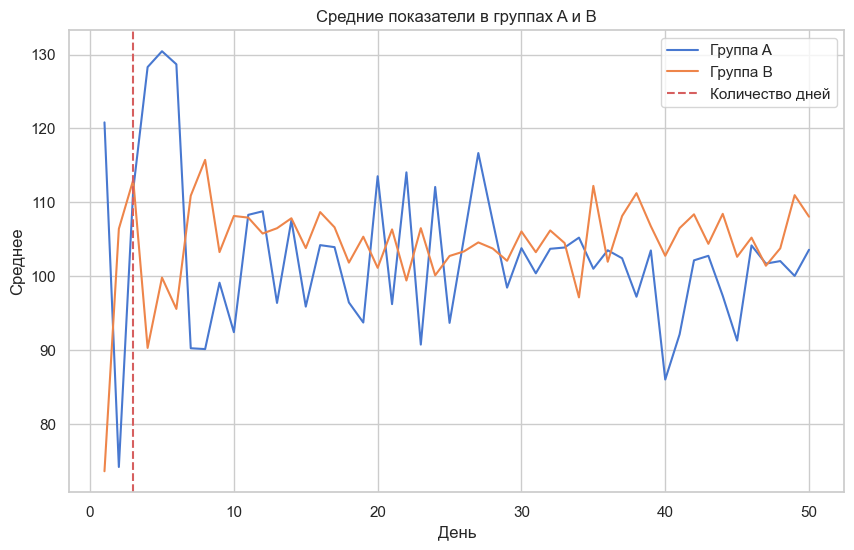

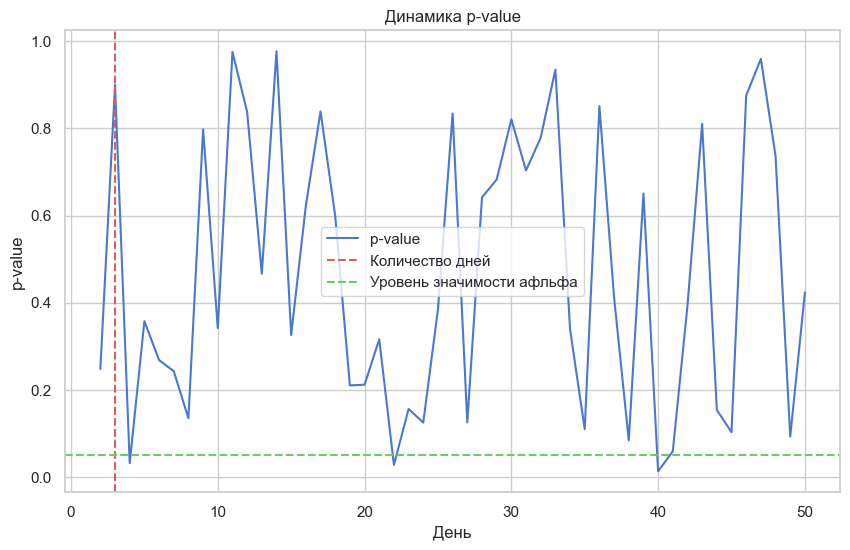

In [37]:
f.plot_metrics_and_pvalue(data, num_days)

На этих графиках эффективно представлено среднее количество пользователей для групп A и B во время A / B-теста, что облегчает анализ вовлеченности пользователей и влияния теста на поведение пользователей. График показывает тенденцию изменения p-значений с течением времени, указывая на то, как изменяется статистическая значимость результатов теста по мере прохождения теста. Линия представляет p-значения, причем каждая точка данных соответствует определенному дню теста.

5. Перегенируруйте шаги 2-4 несколько раз, посмотрев на графики. Что вы видите? Что происходит с p-value в периодах:
    1. до кол-ва дней, посчитанных по формуле из п.1
    2. в точке кол-ва дней, посчитанных по формуле из п.1
    3. после кол-ва дней, посчитанных по формуле из п.1
    
    Опишите выводы максимально подробно.

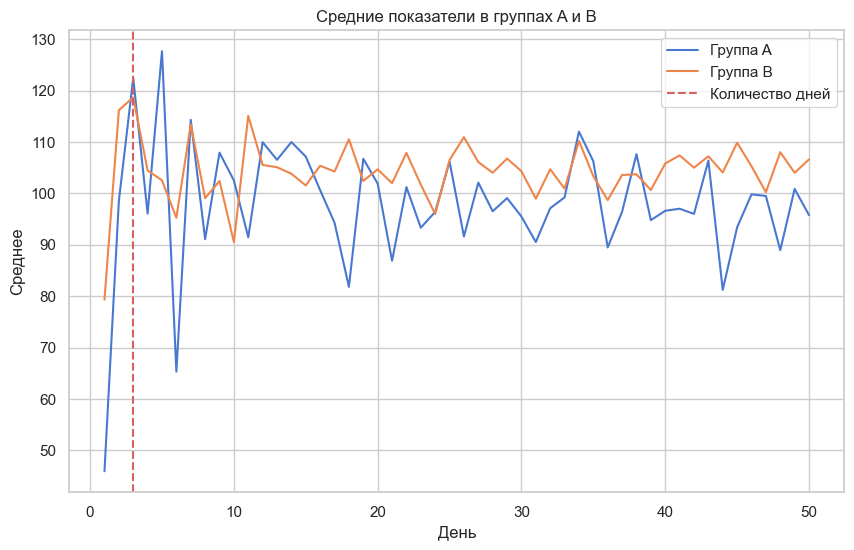

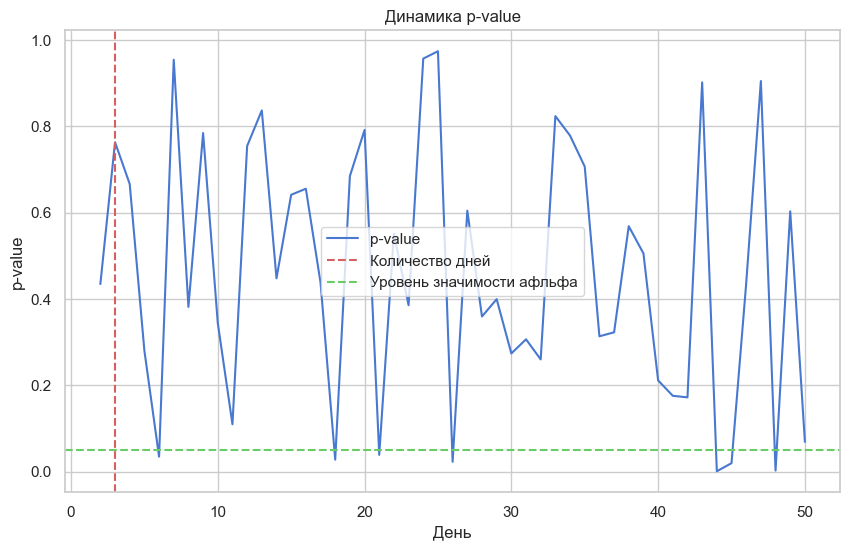

In [31]:
data1 = f.generate_data_and_collect_metrics(X, mean_A, mean_B, std_A, std_B)
f.plot_metrics_and_pvalue(data1, num_days)

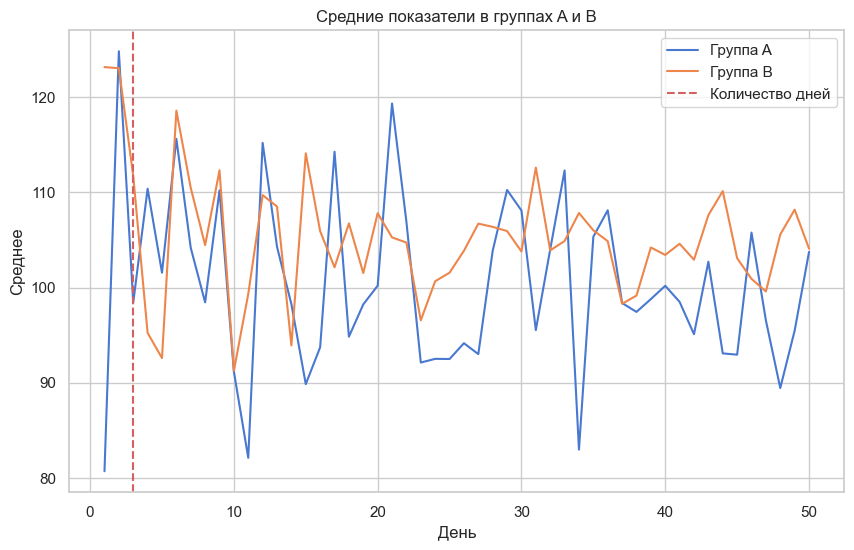

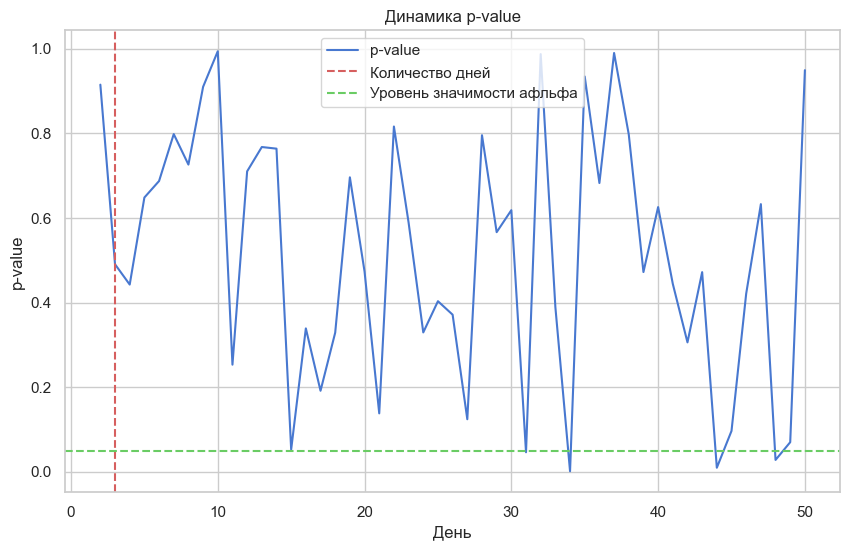

In [32]:
data2 = f.generate_data_and_collect_metrics(X, mean_A, mean_B, std_A, std_B)
f.plot_metrics_and_pvalue(data2, num_days)

Повторяя шаги 2-4 несколько раз и наблюдая за графиками, мы можем сделать следующие выводы:

__Вплоть до количества дней:__ Значение `p`, сильно варьируется и значительно колеблется. Поскольку размер выборки невелик, тест может не обладать достаточной статистической мощью для точного выявления существенных различий между группами. Следовательно, значение `p` может быть ненадежным в течение этого начального периода.

__В точке количество дней:__ Значение `p` варьируется в зависимости от конкретных данных, генерируемых на каждой итерации. Некоторые итерации  показывают статистически значимые различия между группами `(p-значение < альфа)`.

__По истечении количества дней:__ По мере продолжения теста и накопления большего количества данных значение `p` имеет тенденцию к стабилизации. При большем размере выборки тест становится более надежным, а значение `p` становится более надежным показателем статистической значимости наблюдаемых различий между группами.

6. Теперь предположим, что мы поменяли наш $MDE$ до $1$ у.е. То есть мат. ожидание в группе А осталось по-прежнему $100$, а вот в группе Б теперь $101$. Перегенерируйте пункты 2-4 для измененного $MDE$, при этом кол-во дней в п.1 не пересчитывайте. Что происходит с p-value? Сделайте выводы.

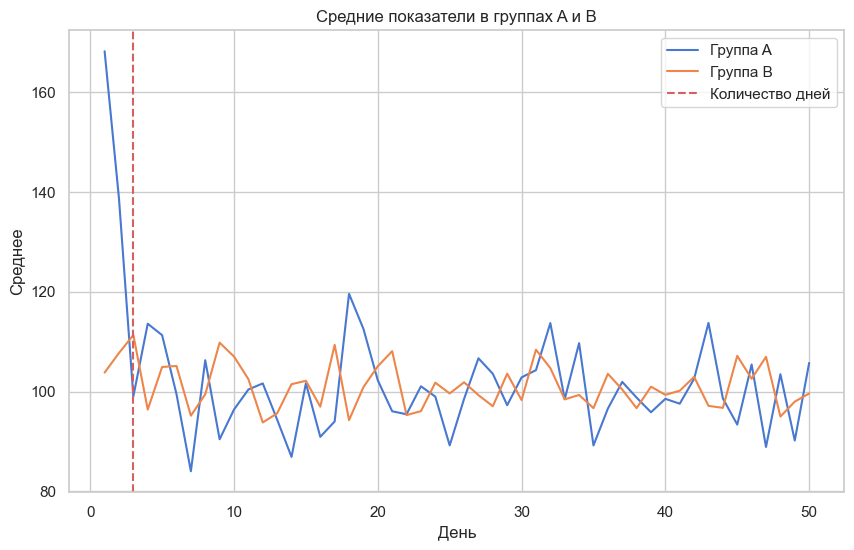

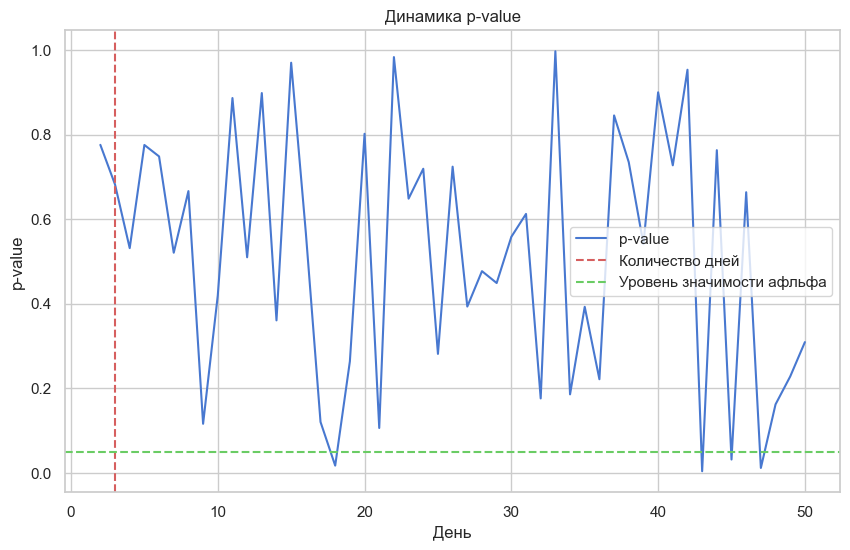

In [33]:
data = f.generate_data_and_collect_metrics(X, mean_A, 101, std_A, std_B)
f.plot_metrics_and_pvalue(data, num_days)

Значения `p`, становятся меньше, когда `MDE` уменьшается с 5 до 1. Это указывает на то, что меньший `MDE` облегчает выявление меньших различий между группами как статистически значимых.

В динамике среднего показателя в группах А и В мы наблюдаем меньшие различия между двумя группами с течением времени по сравнению с предыдущим сценарием. Это связано с тем, что минимальный ожидаемый размер эффекта (MDE) теперь меньше.

График `p-value` показывает больше случаев, когда `p-value` опускается ниже уровня альфа. Это говорит о том, что тест может быстрее достичь статистической значимости из-за снижения `MDE`.

__с) [20баллов] Симуляция А/А-теста__

Теперь представим, что изменений на самом деле никаких нету, то есть мат. ожидание в обоих группах $100$, а $MDE = 0$

1. И снова перегенерируйте вышесделанные пункты 2-4. Что происходит с p-value? Может ли оно оказаться ниже уровня значимости? 

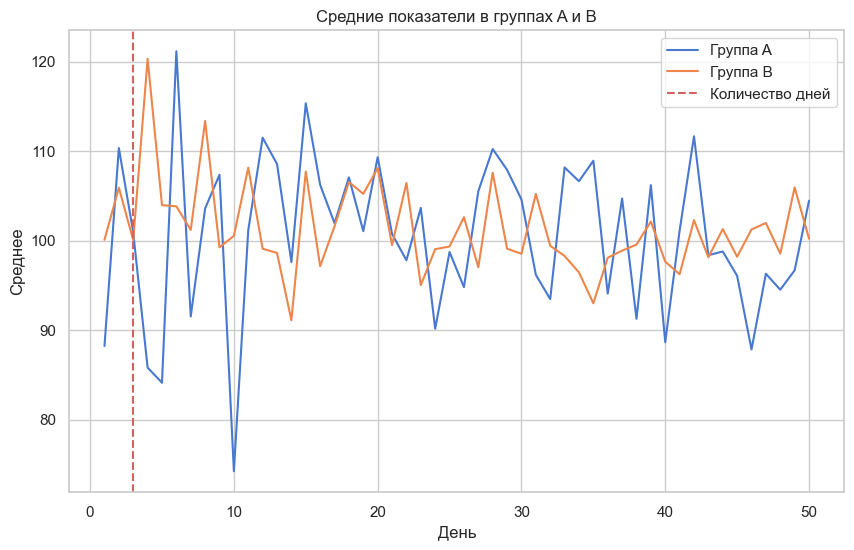

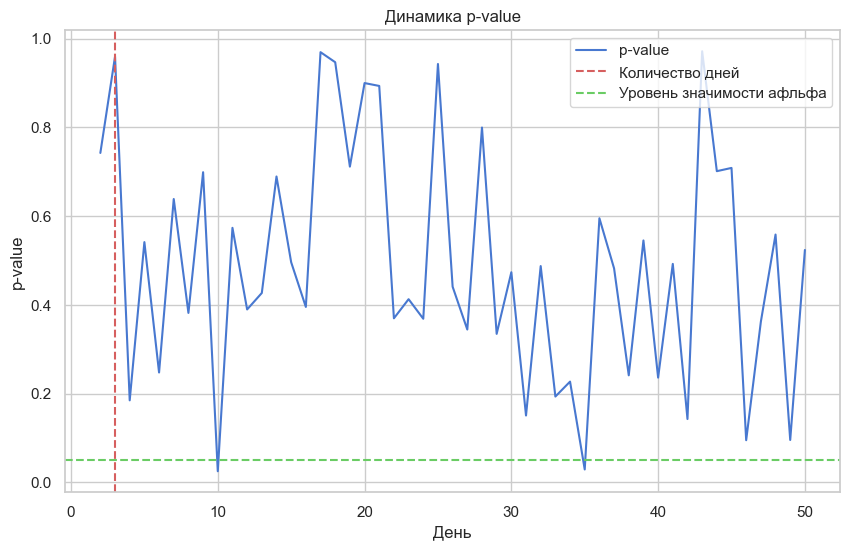

In [34]:
data3 = f.generate_data_and_collect_metrics(X, 100, 100, std_A, std_B)
f.plot_metrics_and_pvalue(data3, num_days)

Если математическое ожидание в обеих группах равно $100$ и минимальный ожидаемый размер эффекта (MDE) равен $0$, то ожидается, что нет реальных различий между группами и тест не должен обнаружить статистически значимых различий

График средних значений показывает статическое равенство между средними значениями в обеих группах. Нет ожидаемой динамики или различий между группами.

2. Ну и напоследок, напишите функцию, которая генерирует p-value на последний день A/A теста. А затем запустите эту функцию $1000$ раз, собрав $1000$ значений p-value. Постройте гистограмму их распределения. Что вы видите? 

__Подсказка:__ Для такой функции достаточно создать выборку один раз, изменив ее размер.

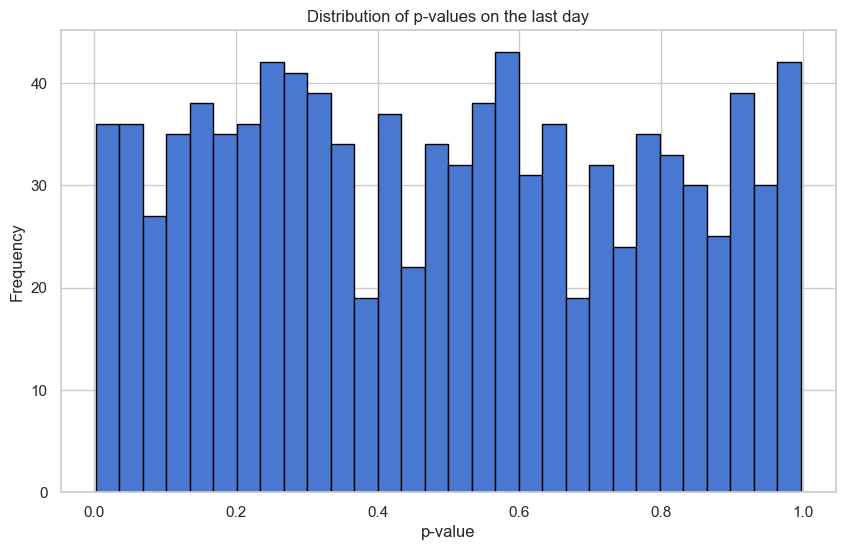

In [35]:
p_values = f.generate_p_values_on_last_day(X, mean_A, std_A)

plt.figure(figsize=(10, 6))
plt.hist(p_values, bins=30, edgecolor='black')
plt.xlabel('p-value')
plt.ylabel('Frequency')
plt.title('Distribution of p-values on the last day')
plt.grid(True)
plt.show()

Форма гистограммы свидетельствует о том, что `p-value` равномерно распределены по всему диапазону. Случайное распределение `p-value`, напоминающее однородную форму, позволяет предположить, что A/A-тест не выявил каких-либо существенных различий между двумя группами.